In [1]:
# importing liabraries
import pandas as pd
import numpy as np

In [130]:
# loading the data set
df = pd.read_csv('/content/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [4]:
# checking the data types of the variables
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [5]:
# statistical measures for each variable
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# checking null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
# checking duplicates in the data set
duplicate_count = int(df.duplicated().sum())
print(duplicate_count)

0


In [8]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


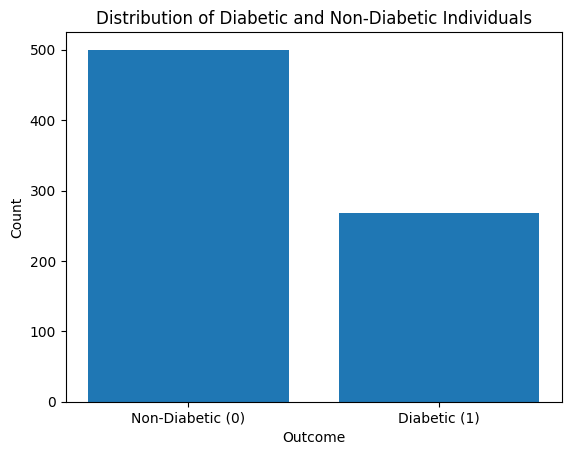

In [9]:
# visualising the distribution of the outcomes

import matplotlib.pyplot as plt

outcome_counts = df['Outcome'].value_counts().sort_index()  # ensures 0 comes before 1

labels = ['Non-Diabetic (0)', 'Diabetic (1)']
values = outcome_counts.values

plt.bar(labels, values)

plt.title('Distribution of Diabetic and Non-Diabetic Individuals')
plt.xlabel('Outcome')
plt.ylabel('Count')

plt.show()

Now let's check the mean value for each variable for both the class diabetic (1) and non-diabetic (0)

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


* Diabetic individuals tend to have more pregnancies than non-diabetics.

* Glucose levels are significantly higher in diabetics.

* Diabetics show slightly higher blood pressure.

* Skin thickness is generally greater in diabetics, indicating more body fat.

* Insulin levels are higher among diabetics, possibly due to insulin resistance.

* Diabetics have a higher Body Mass Index (BMI), indicating obesity.

* Family history of diabetes is more prominent in diabetics.

* Diabetic individuals are older on average compared to non-diabetics.



In [11]:
# Let's divide the dataset into x and y where y is the outcome and x is the all other variables
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Data Standardisation

The standardisation is required since the range of each variables are different.If standardisation os not done, Features with large values (eg: Glucose) will dominate the model and features with small values (eg: Pedigree) will be nearly ignored. The model becomes biased toward large-scale features, leading to poor learning and prediction.


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)
Y_scaled = Y

In [16]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

Splitting the data

In [105]:
from sklearn.model_selection import train_test_split

# Using stratify=Y in train_test_split keeps the ratio of classes (like 1 : 0) the same in both training and testing sets as it is in the original dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, stratify=Y_scaled, random_state=2)

In [18]:
print(X_scaled.shape, X_train.shape, X_test.shape)
print(Y_scaled.shape, Y_train.shape, Y_test.shape)

(768, 8) (614, 8) (154, 8)
(768,) (614,) (154,)


We have to perform SMOTE technique to handle the imbalance in the dependent variable

In [19]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [20]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

# Check original class distribution
print("Original training set class distribution:")
print(pd.Series(Y_train).value_counts())

# Check resampled class distribution
print("\nAfter SMOTE resampling:")
print(pd.Series(Y_train_res).value_counts())


Original training set class distribution:
Outcome
0    400
1    214
Name: count, dtype: int64

After SMOTE resampling:
Outcome
1    400
0    400
Name: count, dtype: int64


checking model performance with SMOTE data

In [52]:
# Import Libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier


#  Define classifiers
classifiers = {
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# Train and evaluate classifiers
results = []

for name, clf in classifiers.items():
    clf.fit(X_train_res, Y_train_res)  # Train on SMOTE-resampled data
    Y_pred = clf.predict(X_test)       # Evaluate on original test set

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1-Score": f1_score(Y_test, Y_pred)
    })

# Display results sorted by F1-Score
results_df1 = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
results_df1

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:19:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
1,Logistic Regression,0.746753,0.631579,0.666667,0.648649
2,Random Forest,0.746753,0.647059,0.611111,0.628571
3,XGBoost,0.720779,0.596491,0.629630,0.612613
0,SVM,0.714286,0.592593,0.592593,0.592593


Hyper parameter tuning using GridSearchCV

In [22]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 5, 10],
            'penalty': ['l2'],
            'class_weight': ['balanced', None]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None]
        }
    },
    'xgboost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'svm': {
        'model': SVC(gamma='auto', probability=True, random_state=42),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    }
}


In [23]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)

    # Fit on your actual training data (SMOTE-resampled)
    grid.fit(X_train_res, Y_train_res)

    # Append best score and parameters
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [24]:
dir(grid)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [142]:
cv_summary_df = pd.DataFrame(scores)
cv_summary_df

,model,best_score,best_params
0,logistic_regression,0.77000,"{'C': 5, 'class_weight': 'balanced', 'penalty'..."
1,random_forest,0.83250,"{'class_weight': 'balanced', 'max_depth': None..."
2,xgboost,0.82875,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."
3,svm,0.81875,"{'C': 10, 'kernel': 'rbf'}"


checking model performance with SMOTE+ GridsearchCV data

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models with the best hyperparameters from GridSearchCV
best_models = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', multi_class='auto', max_iter=1000,
        C=5, penalty='l2', class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=None, min_samples_split=5,
        class_weight='balanced', random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100, max_depth=7, learning_rate=0.1,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    "SVM": SVC(
        C=10, kernel='rbf', gamma='auto', probability=True, random_state=42
    )
}

# List to store evaluation metrics
results = []

# Evaluate each model
for name, model in best_models.items():
    # Train on SMOTE-resampled training data
    model.fit(X_train_res, Y_train_res)

    # Predict on original test set
    Y_pred = model.predict(X_test)

    # Store metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, average='weighted'),
        "Recall": recall_score(Y_test, Y_pred,average='weighted'),
        "F1-Score": f1_score(Y_test, Y_pred,average='weighted')
    })

# Convert to DataFrame and sort by F1-Score
results_df2 = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
results_df2


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:12:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.746753,0.750315,0.746753,0.748247
1,Random Forest,0.727273,0.729724,0.727273,0.728375
2,XGBoost,0.701299,0.706813,0.701299,0.703585
3,SVM,0.675325,0.672641,0.675325,0.673869


checking model performance with scaled data(no smote and hyperparameter tuning)

In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest"      : RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost"            : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM"                : SVC(kernel='rbf', probability=True, random_state=42)
}

results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(Y_test, Y_test_pred),
        "Precision": precision_score(Y_test, Y_test_pred,average='weighted'),
        "Recall": recall_score(Y_test, Y_test_pred,average='weighted'),
        "F1-Score": f1_score(Y_test, Y_test_pred,average='weighted')})

# Convert to DataFrame
results_df3 = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
results_df3


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:48:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.759740,0.753590,0.759740,0.752380
0,Logistic Regression,0.759740,0.754289,0.759740,0.748746
2,XGBoost,0.746753,0.741050,0.746753,0.742259
3,SVM,0.727273,0.718028,0.727273,0.711259


In [66]:
import pandas as pd

# Add a column to identify the setup
results_df1['Setup'] = 'Scaled + SMOTE'
results_df2['Setup'] = 'Scaled + SMOTE + Hyperparam'
results_df3['Setup'] = 'Scaled only'

# Combine all results into a single DataFrame
final_comparison_df = pd.concat([results_df1, results_df2, results_df3], ignore_index=True)

# Optional: sort by F1-Score descending
final_comparison_df = final_comparison_df.sort_values(by='F1-Score', ascending=False)

# Display
final_comparison_df


,Model,Accuracy,Precision,Recall,F1-Score,Setup
8,Random Forest,0.759740,0.753590,0.759740,0.752380,Scaled only
9,Logistic Regression,0.759740,0.754289,0.759740,0.748746,Scaled only
4,Logistic Regression,0.746753,0.750315,0.746753,0.748247,Scaled + SMOTE + Hyperparam
10,XGBoost,0.746753,0.741050,0.746753,0.742259,Scaled only
5,Random Forest,0.727273,0.729724,0.727273,0.728375,Scaled + SMOTE + Hyperparam
11,SVM,0.727273,0.718028,0.727273,0.711259,Scaled only
6,XGBoost,0.701299,0.706813,0.701299,0.703585,Scaled + SMOTE + Hyperparam
7,SVM,0.675325,0.672641,0.675325,0.673869,Scaled + SMOTE + Hyperparam
0,Logistic Regression,0.746753,0.631579,0.666667,0.648649,Scaled + SMOTE
1,Random Forest,0.746753,0.647059,0.611111,0.628571,Scaled + SMOTE


Making Prediction Using Random Forest Classifier with scaled data only

In [70]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, Y_train)
Y_pred = final_model.predict(X_test)

In [71]:
accuracy  = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall    = recall_score(Y_test, Y_pred, average='weighted')
f1        = f1_score(Y_test, Y_pred, average='weighted')

print(f"Test Accuracy : {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall   : {recall}")
print(f"Test F1-score : {f1}")

Test Accuracy : 0.7597402597402597
Test Precision: 0.7535895907988931
Test Recall   : 0.7597402597402597
Test F1-score : 0.7523799794283988


In [133]:
def predict_diabetes(model, scaler, input_data):

    import numpy as np

    # Convert to numpy array and reshape
    input_array = np.asarray(input_data).reshape(1, -1)

    # Standardize using the fitted scaler
    input_scaled = scaler.transform(input_array)

    # Predict
    prediction = model.predict(input_scaled)

    # Map to label
    return 'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'


In [134]:
input1 = [4, 110, 92, 0, 0, 37.6, 0.191, 30]
result = predict_diabetes(final_model, scaler, input1)
print("Prediction:", result)


Prediction: Non-Diabetic


In [135]:
input2 = [8,183,64,0,0,23.3,0.672,32]#1
result = predict_diabetes(final_model, scaler, input2)
print("Prediction:", result)

Prediction: Diabetic


In [136]:
input3 = [1,89,66,23,94,28.1,0.167,21] #0
result = predict_diabetes(final_model, scaler, input3)
print("Prediction:", result)

Prediction: Non-Diabetic


In [140]:
input4 = [5,166,72,19,175,25.8,0.587,51] #1
result = predict_diabetes(final_model, scaler, input4)
print("Prediction:", result)

Prediction: Diabetic
